<a href="https://colab.research.google.com/github/PALBIBEK/Bengali.AI-Handwritten-Grapheme-Classification/blob/main/EDA_AND_K_MEANS_CLUSTERING_OF_IRIS_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
cols=list(df.columns)
for col in cols:
  print(df[col].info())
  print("\n")

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: sepal_length
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: sepal_width
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: petal_length
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: petal_width
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB
None


<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
150 n

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
import seaborn as sb

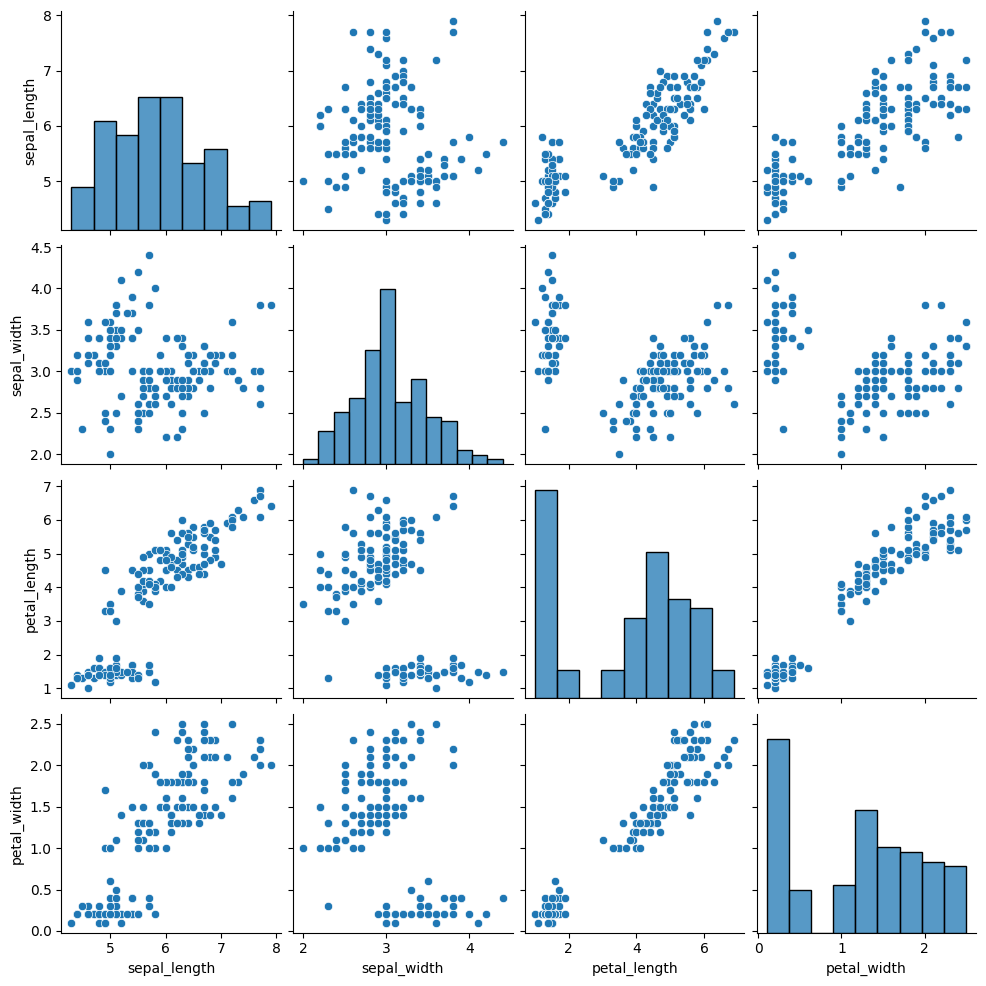

In [ ]:

sb.pairplot(df)

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

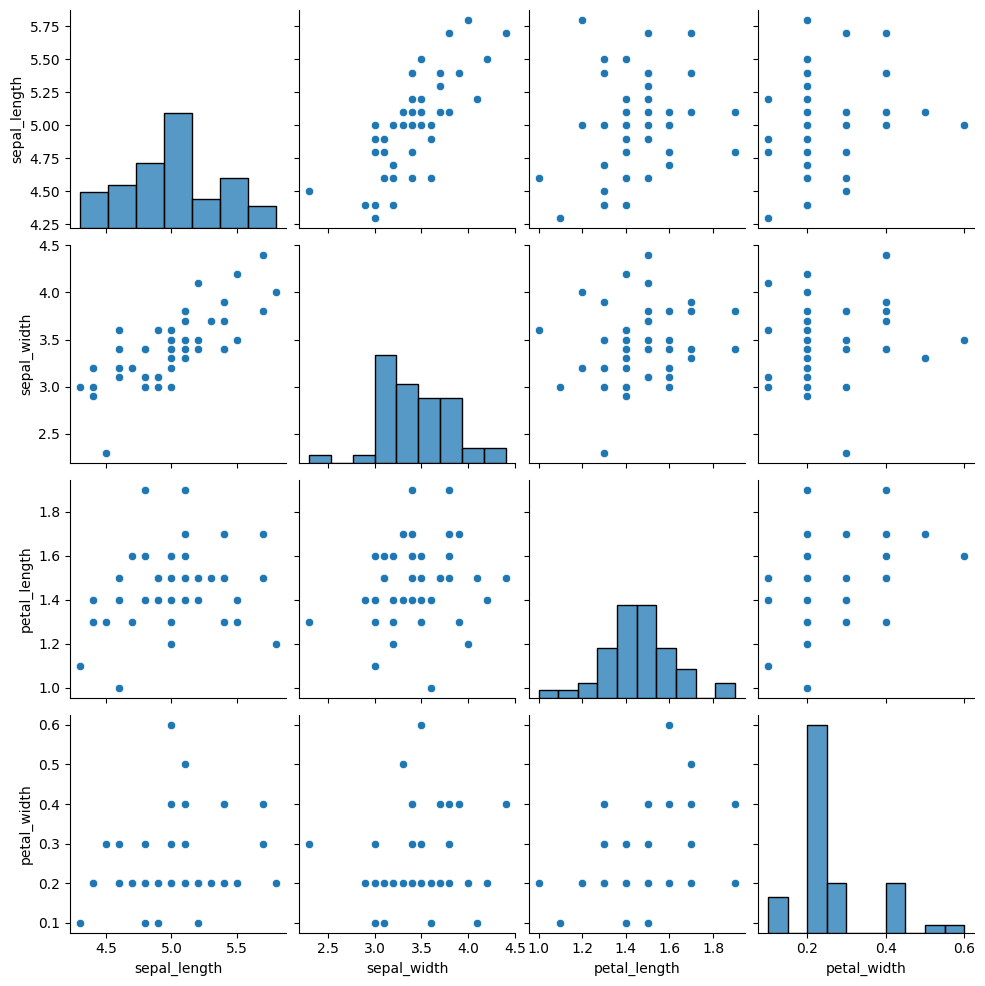

In [ ]:
df1=df[df['species']=='setosa']
sb.pairplot(df1)

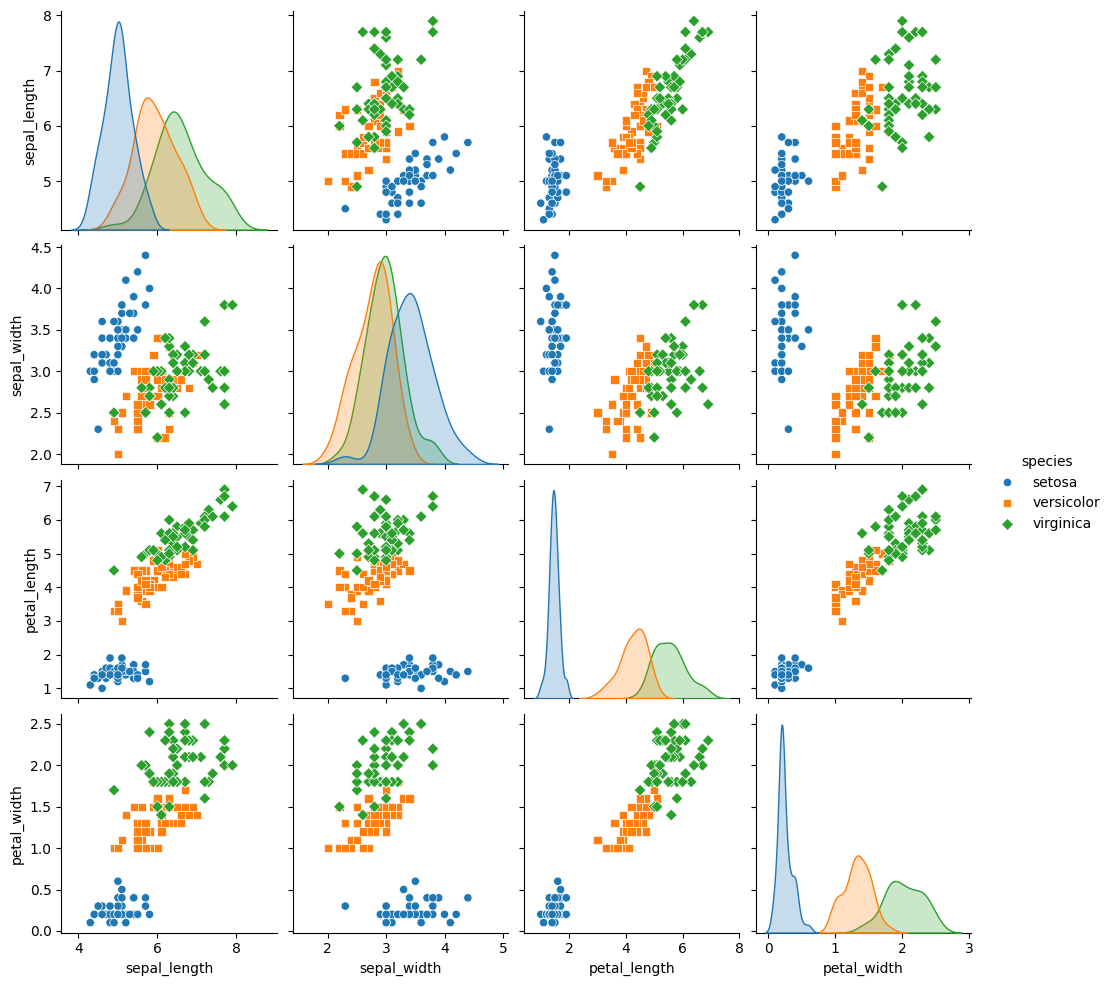

In [ ]:
# Create a pair plot with customized settings
pair_plot = sb.pairplot(df, hue='species', diag_kind='kde', markers=['o', 's', 'D'])


<Figure size 2000x1000 with 0 Axes>

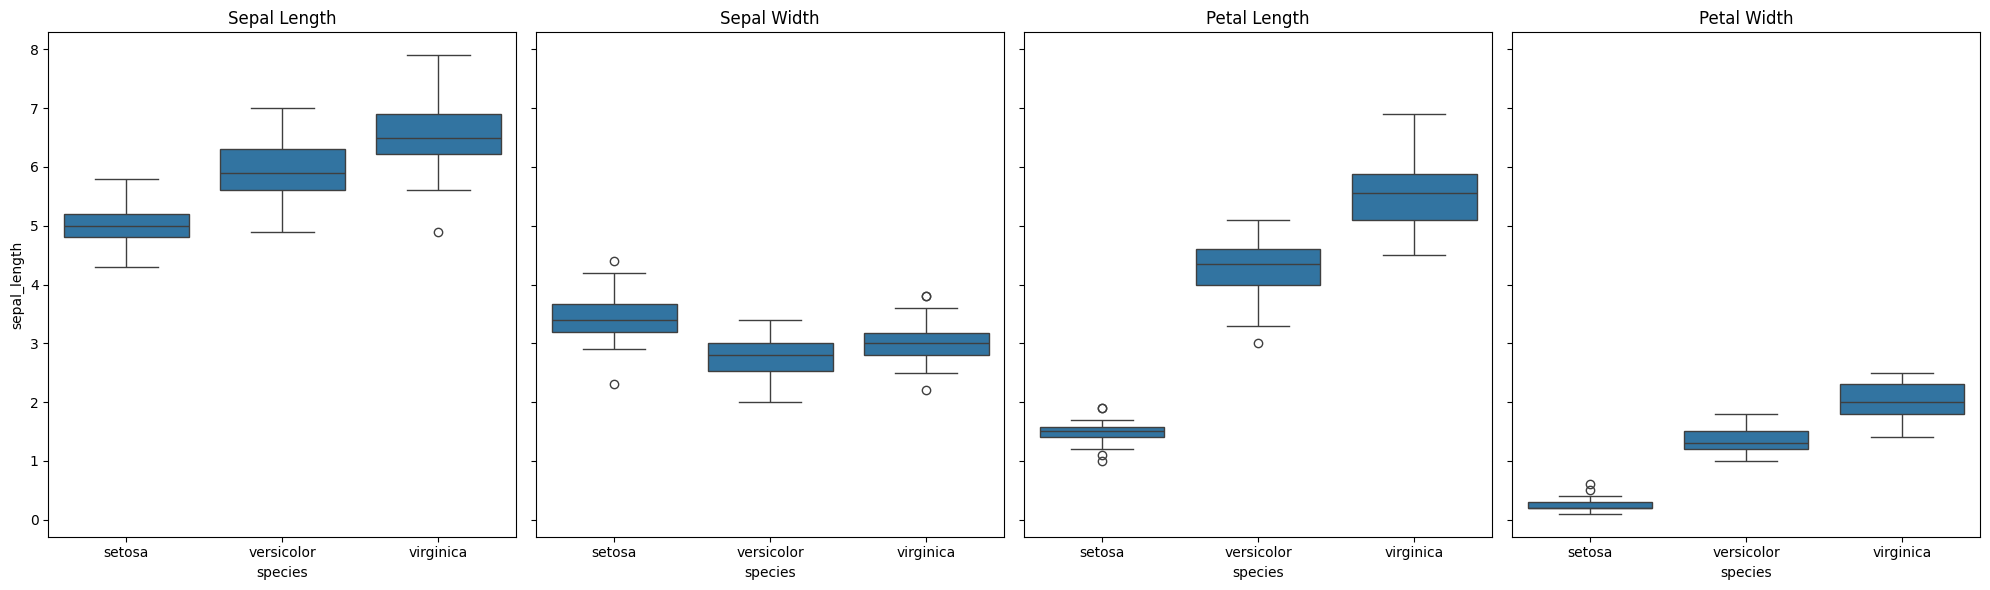

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Plot sepal_length
sb.boxplot(x="species", y="sepal_length", data=df, ax=axes[0])
axes[0].set_title('Sepal Length')

# Plot sepal_width
sb.boxplot(x="species", y="sepal_width", data=df, ax=axes[1])
axes[1].set_title('Sepal Width')

# Plot petal_length
sb.boxplot(x="species", y="petal_length", data=df, ax=axes[2])
axes[2].set_title('Petal Length')

# Plot petal_width
sb.boxplot(x="species", y="petal_width", data=df, ax=axes[3])
axes[3].set_title('Petal Width')

plt.tight_layout()
plt.show()



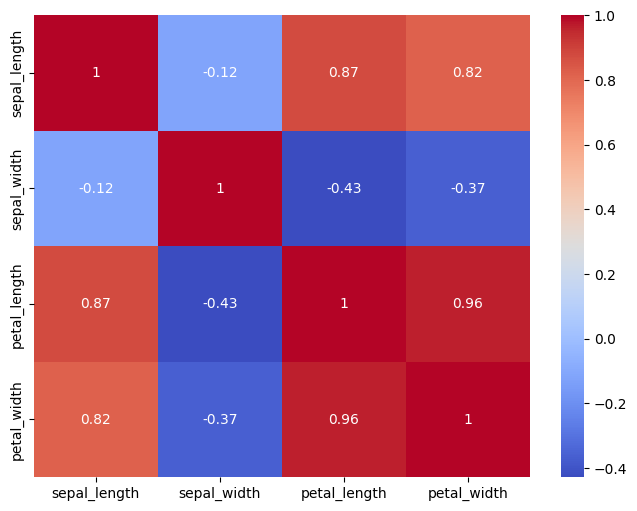

In [ ]:
numerical_df = df.drop(columns=['species'])

plt.figure(figsize=(8, 6))
corr = numerical_df.corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

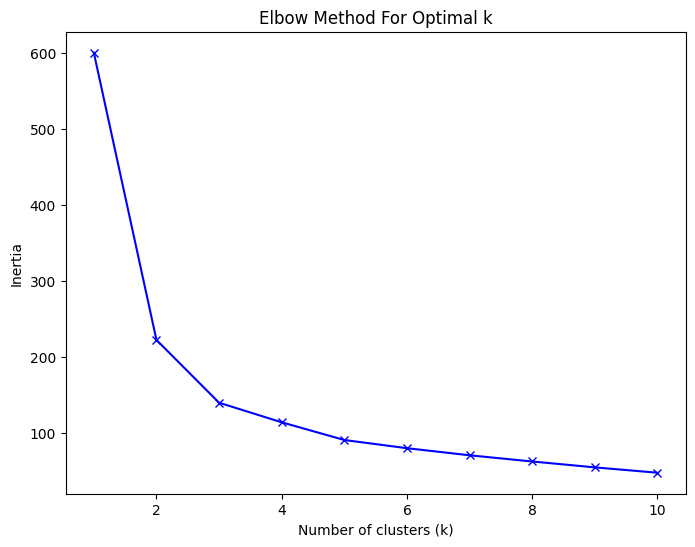

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


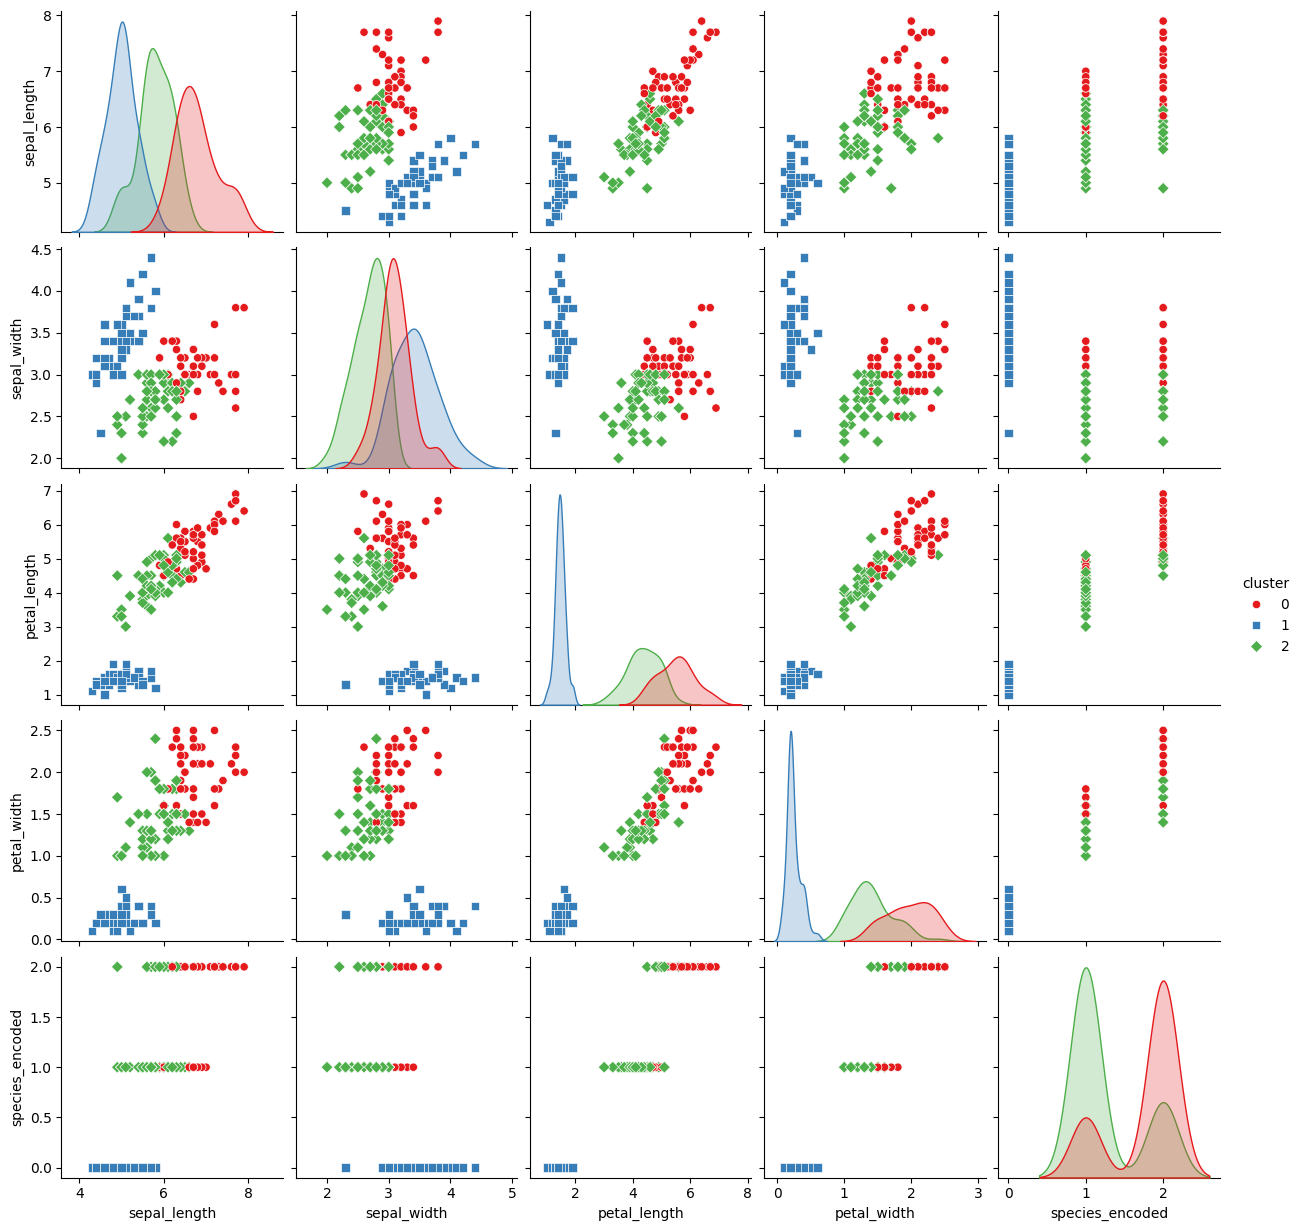

Silhouette Score: 0.460


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Encode the species column numerically
df['species_encoded'] = pd.factorize(df['species'])[0]

# Exclude the 'species' and 'species_encoded' columns from the clustering
features = df.drop(columns=['species', 'species_encoded'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
df['cluster'] = clusters

# Visualize the clusters using a pairplot
sns.pairplot(df, hue='cluster', palette='Set1', markers=['o', 's', 'D'])
plt.show()

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply K-means on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans.fit_predict(pca_features)

# Calculate the silhouette score
silhouette_avg_pca = silhouette_score(pca_features, clusters_pca)
print(f'Silhouette Score after PCA: {silhouette_avg_pca:.3f}')


Silhouette Score after PCA: 0.509


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

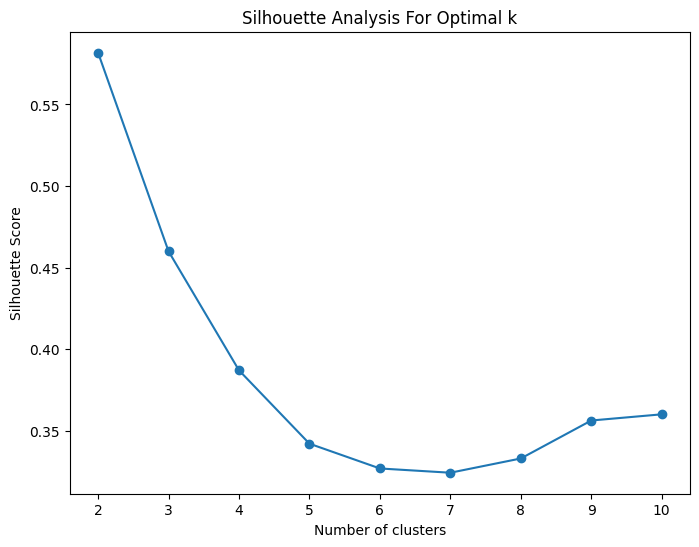

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score with k-means++ and n_init=20: {silhouette_avg:.3f}')


Silhouette Score with k-means++ and n_init=20: 0.460


In [ ]:
from sklearn.ensemble import IsolationForest

# Detect outliers
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(scaled_features) == -1

# Remove outliers and re-run k-means
features_no_outliers = scaled_features[~outliers]
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_no_outliers = kmeans.fit_predict(features_no_outliers)
silhouette_avg_no_outliers = silhouette_score(features_no_outliers, clusters_no_outliers)
print(f'Silhouette Score without outliers: {silhouette_avg_no_outliers:.3f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score without outliers: 0.473
